# Análisis de datos

En este notebook se documenta el proceso de las tareas asociadas al rol de análisis de datos

## Librerías

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
PALETA_PASTEL = [
    '#A3BFFA',  # Azul suave
    '#A7E6D7',  # Verde menta
    '#F4A7B9',  # Rosa pálido
    '#C3AED6',  # Lavanda suave
    '#FFD7A8',  # Melocotón claro
    '#90D4E0',  # Turquesa pastel
    '#E6B3CC',  # Malva claro
    '#B5EAD7',  # Verde celadón
    '#FFCCBC',  # Coral suave
    '#D9D9D9',  # Gris claro
    '#B2C8F0',  # Azul perla
    '#F4C4C4'   # Rosa melocotón
]

In [21]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [22]:
plt.style.use('seaborn-v0_8-whitegrid')  
plt.rcParams.update({
    'font.family': 'Calibri',       
    'font.size': 11,
    'axes.titlesize': 12,
    'axes.titleweight': 'bold',
    'axes.labelweight': 'normal',
    'grid.color': '#E0E0E0',      
    'figure.facecolor': 'white'
})

## Carga de datos

In [4]:
df = pd.read_csv("..\Data\Clean_data.csv", low_memory=False)

In [5]:
columnas_numericas = df.select_dtypes(include=['number']).columns.tolist()
columnas_no_numericas = df.select_dtypes(exclude=['number']).columns.tolist()
print(f"Columnas no numéricas: {columnas_no_numericas}\nColumnas numéricas: {columnas_numericas}")

Columnas no numéricas: ['estu_tipodocumento', 'estu_consecutivo', 'cole_area_ubicacion', 'cole_bilingue', 'cole_calendario', 'cole_caracter', 'cole_depto_ubicacion', 'cole_genero', 'cole_jornada', 'cole_mcpio_ubicacion', 'cole_naturaleza', 'cole_nombre_establecimiento', 'cole_nombre_sede', 'cole_sede_principal', 'estu_depto_presentacion', 'estu_depto_reside', 'estu_estadoinvestigacion', 'estu_estudiante', 'estu_fechanacimiento', 'estu_genero', 'estu_mcpio_presentacion', 'estu_mcpio_reside', 'estu_nacionalidad', 'estu_pais_reside', 'estu_privado_libertad', 'fami_cuartoshogar', 'fami_educacionmadre', 'fami_educacionpadre', 'fami_estratovivienda', 'fami_personashogar', 'fami_tieneautomovil', 'fami_tienecomputador', 'fami_tieneinternet', 'fami_tienelavadora', 'desemp_ingles']
Columnas numéricas: ['periodo', 'cole_cod_dane_establecimiento', 'cole_cod_dane_sede', 'cole_cod_depto_ubicacion', 'cole_cod_mcpio_ubicacion', 'cole_codigo_icfes', 'estu_cod_depto_presentacion', 'estu_cod_mcpio_presen

## Estadísticas descriptivas 

In [6]:
# Estadísticas descriptivas para columnas numéricas
print("\nEstadísticas descriptivas para variables numéricas:")
print(df[columnas_numericas].describe())


Estadísticas descriptivas para variables numéricas:
       periodo  cole_cod_dane_establecimiento  cole_cod_dane_sede  \
count  32343.0                   3.234300e+04        3.234300e+04   
mean   20181.0                   3.491821e+11        3.492604e+11   
std        0.0                   5.036591e+10        5.070437e+10   
min    20181.0                   1.050010e+11        1.050010e+11   
25%    20181.0                   3.117690e+11        3.117690e+11   
50%    20181.0                   3.686790e+11        3.686790e+11   
75%    20181.0                   3.760010e+11        3.760010e+11   
max    20181.0                   5.190010e+11        6.252690e+11   

       cole_cod_depto_ubicacion  cole_cod_mcpio_ubicacion  cole_codigo_icfes  \
count              32343.000000              32343.000000        32343.00000   
mean                  44.856167              44962.663327       109598.42915   
std                   30.735086              30732.838382       151230.54915   
min  

In [7]:
# Estadísticas descriptivas para columnas categóricas
print("\nEstadísticas descriptivas para variables categóricas:")
print(df[columnas_no_numericas].describe(include='object'))


Estadísticas descriptivas para variables categóricas:
       estu_tipodocumento  estu_consecutivo cole_area_ubicacion cole_bilingue  \
count               32343             32343               32343         32343   
unique                  8             19794                   2             3   
top                    TI  SB11201810021815              URBANO            No   
freq                24944                 3               28236         20317   

       cole_calendario cole_caracter cole_depto_ubicacion cole_genero  \
count            32343         32343                32343       32343   
unique               3             5                   29           3   
top                  B     ACADEMICO                VALLE       MIXTO   
freq             25826         25003                14166       29079   

       cole_jornada cole_mcpio_ubicacion  ... fami_cuartoshogar  \
count         32343                32343  ...             32343   
unique            6                  13

In [35]:
for columna in columnas_no_numericas:
    print(f"\n Columna: {columna}")
    print("Valores únicos:", df[columna].nunique())
    print("Muestra de valores:", df[columna].unique())


 Columna: estu_tipodocumento
Valores únicos: 8
Muestra de valores: ['CC' 'TI' 'CE' 'CR' 'PE' 'RC' 'PC' 'V']

 Columna: estu_consecutivo
Valores únicos: 19794
Muestra de valores: ['SB11201810003214' 'SB11201810043861' 'SB11201810004937' ...
 'SB11201810001140' 'SB11201810024724' 'SB11201810019065']

 Columna: cole_area_ubicacion
Valores únicos: 2
Muestra de valores: ['URBANO' 'RURAL']

 Columna: cole_bilingue
Valores únicos: 3
Muestra de valores: ['No' 'Desconocido' 'Si']

 Columna: cole_calendario
Valores únicos: 3
Muestra de valores: ['B' 'OTRO' 'A']

 Columna: cole_caracter
Valores únicos: 5
Muestra de valores: ['ACADEMICO' 'Desconocido' 'NO APLICA' 'TECNICO' 'TECNICO/ACADEMICO']

 Columna: cole_depto_ubicacion
Valores únicos: 29
Muestra de valores: ['VALLE' 'CUNDINAMARCA' 'SANTANDER' 'ATLANTICO' 'ANTIOQUIA' 'BOGOTA'
 'CALDAS' 'CAUCA' 'NARINO' 'RISARALDA' 'ARAUCA' 'QUINDIO' 'BOLIVAR'
 'NORTE SANTANDER' 'META' 'CESAR' 'BOYACA' 'MAGDALENA' 'PUTUMAYO'
 'CASANARE' 'TOLIMA' 'LA GUAJIRA' 

### Puntajes

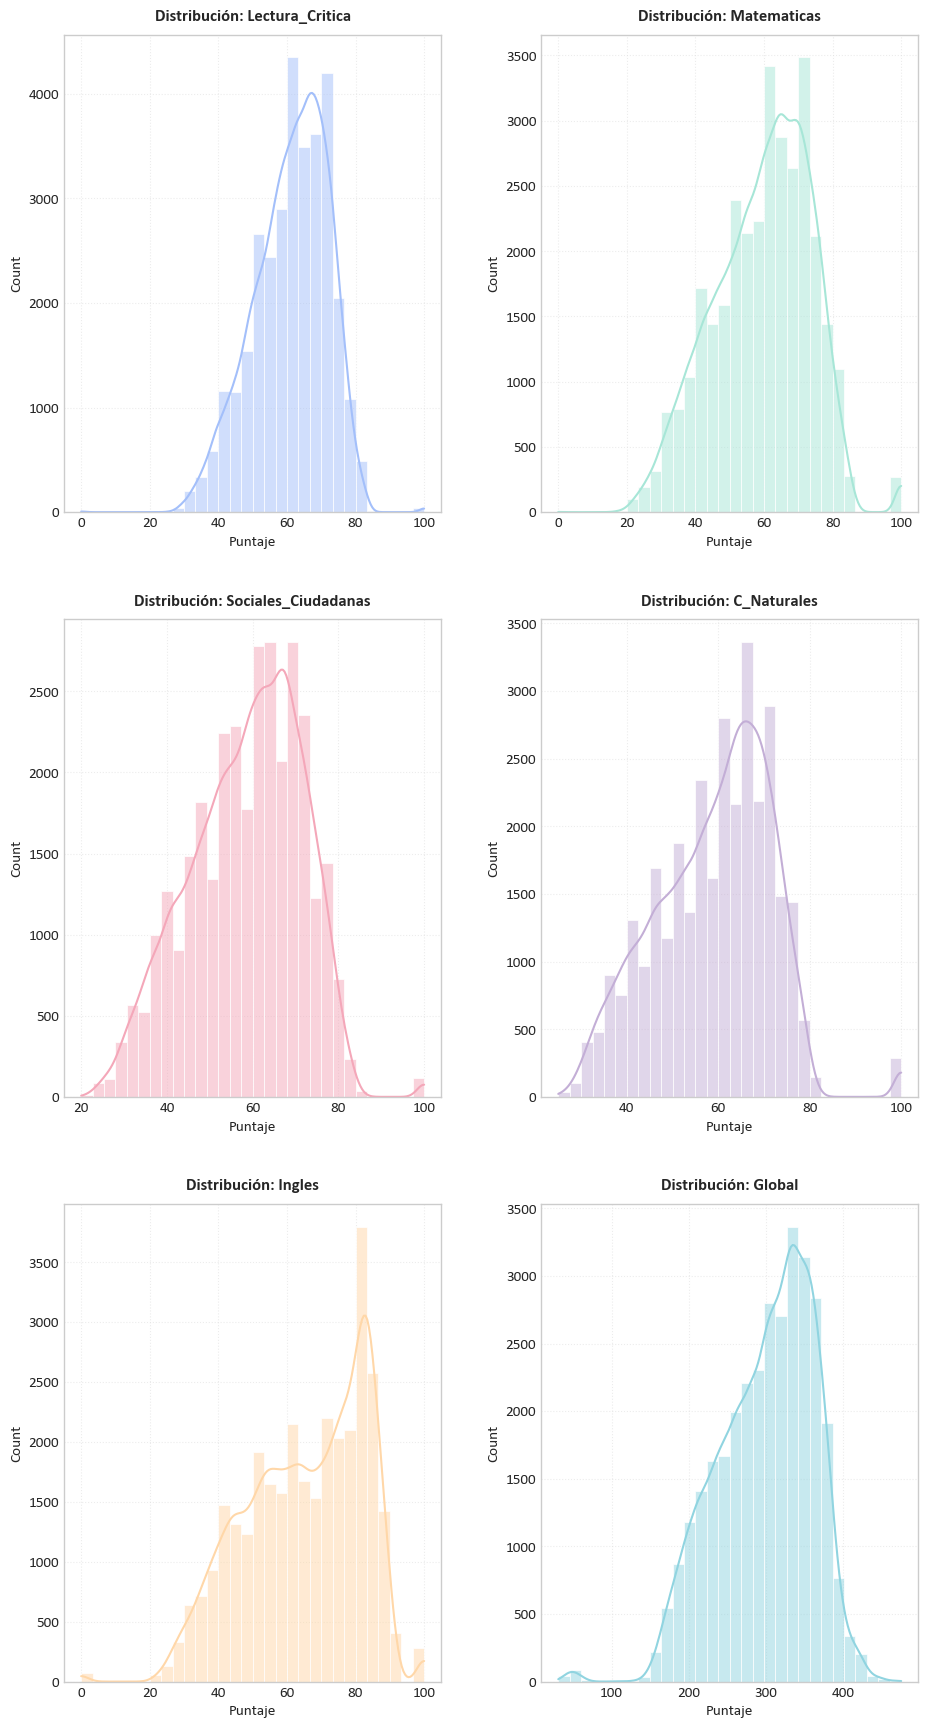

In [40]:
# Crear la cuadrícula de subgráficos
fig, axs = plt.subplots(3, 2, figsize=(10, 18))

# Lista de puntajes
puntajes = ['punt_lectura_critica', 'punt_matematicas', 'punt_sociales_ciudadanas', 
            'punt_c_naturales', 'punt_ingles', 'punt_global']

# Iterar sobre los puntajes
for i, col in enumerate(puntajes):
    ax = axs[i//2, i%2]  # Corregir índices: i//2 para filas, i%2 para columnas
    sns.histplot(data=df, x=col, kde=True, bins=30, ax=ax, 
                 color=PALETA_PASTEL[i%len(PALETA_PASTEL)], 
                 edgecolor='white', linewidth=0.5)
    ax.set_title(f'Distribución: {col.replace("punt_", "").title()}', pad=10)
    ax.set_xlabel('Puntaje')
    ax.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout(pad=3.0)
plt.show()

In [24]:
# fig, axs = plt.subplots(2, 3, figsize=(18, 10))
# puntajes = ['punt_lectura_critica', 'punt_matematicas', 'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_ingles', 'punt_global']
# for i, col in enumerate(puntajes):
#     ax = axs[i//3, i%3]
#     sns.histplot(data=df, x=col, kde=True, bins=30, ax=ax, color='steelblue')
#     ax.set_title(f'Distribución: {col}')
# plt.tight_layout()
# plt.show()

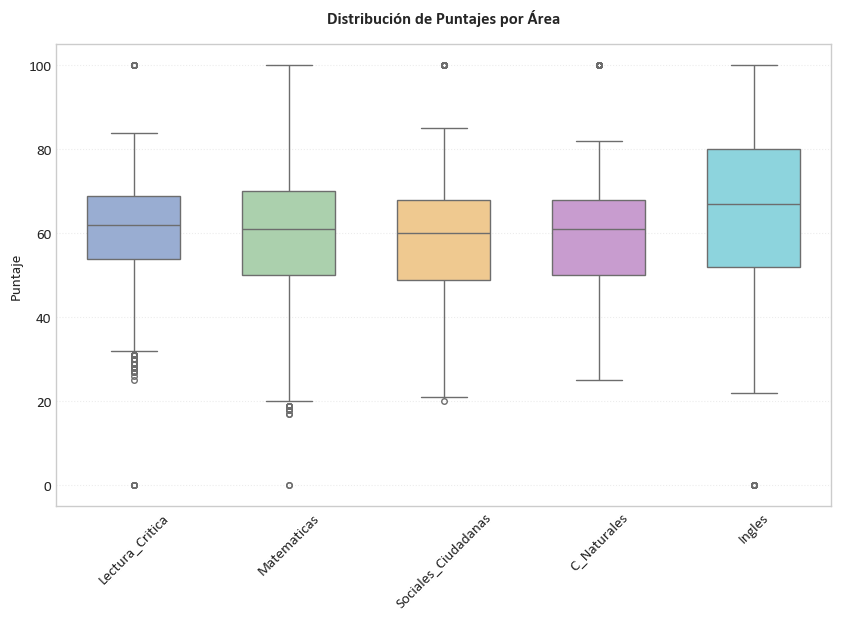

In [29]:
plt.figure(figsize=(10, 6))  

ax = sns.boxplot(data=df[puntajes[:-1]], palette=PALETA_PASTEL[:5], 
                 width=0.6, linewidth=1, fliersize=4)
plt.title("Distribución de Puntajes por Área", pad=15)

# Configurar ticks y etiquetas
ax.set_xticks(range(len(puntajes[:-1])))
ax.set_xticklabels([col.replace("punt_", "").title() for col in puntajes[:-1]], rotation=45)
plt.ylabel("Puntaje")
plt.grid(axis='y', linestyle=':', alpha=0.6)

plt.show()

In [30]:
# puntajes = ['punt_lectura_critica', 'punt_matematicas', 'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_ingles']
# plt.figure(figsize=(12, 6))
# sns.boxplot(data=df[puntajes], palette="Set2")
# plt.title("Boxplot de puntajes por área")
# plt.xticks(rotation=45)
# plt.show()

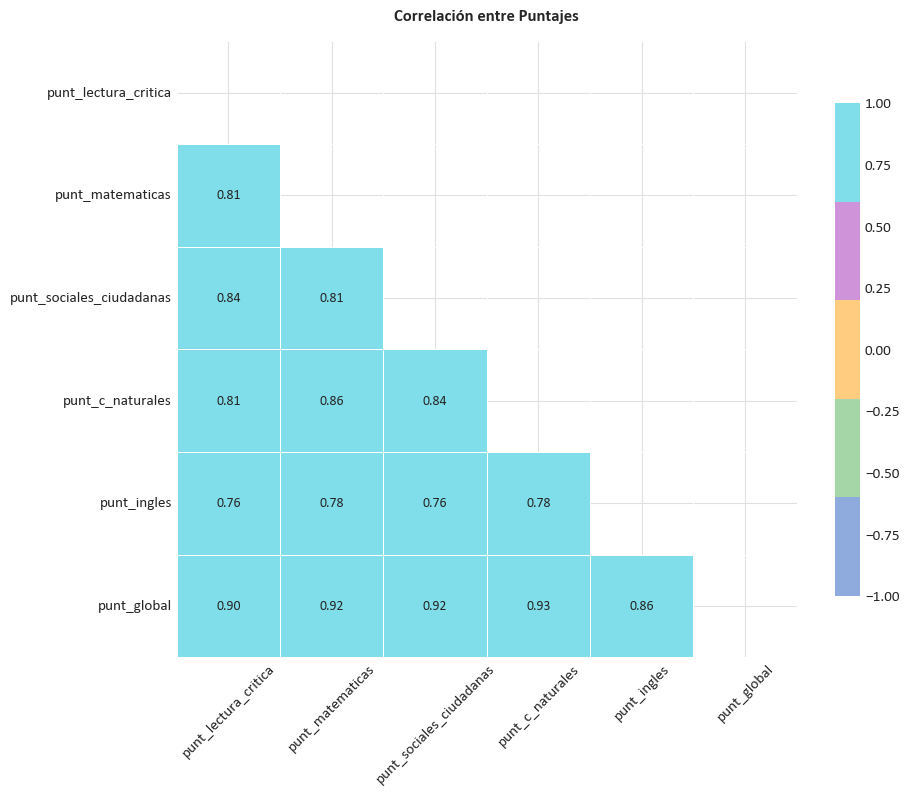

In [31]:
plt.figure(figsize=(10, 8))
corr = df[puntajes].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))  

sns.heatmap(corr, annot=True, fmt=".2f", cmap=PALETA_PASTEL[:5], 
            mask=mask, vmin=-1, vmax=1, 
            annot_kws={"size": 10}, cbar_kws={"shrink": 0.8},
            linewidths=0.5, linecolor='white')

plt.title("Correlación entre Puntajes", pad=15)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [32]:
# puntajes = ['punt_lectura_critica', 'punt_matematicas', 'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_ingles', 'punt_global']
# corr = df[puntajes].corr()
# sns.heatmap(corr, annot=True, cmap='coolwarm')
# plt.title("Correlación entre puntajes")
# plt.show()

### Perfilamiento demográfico y socioeconómico

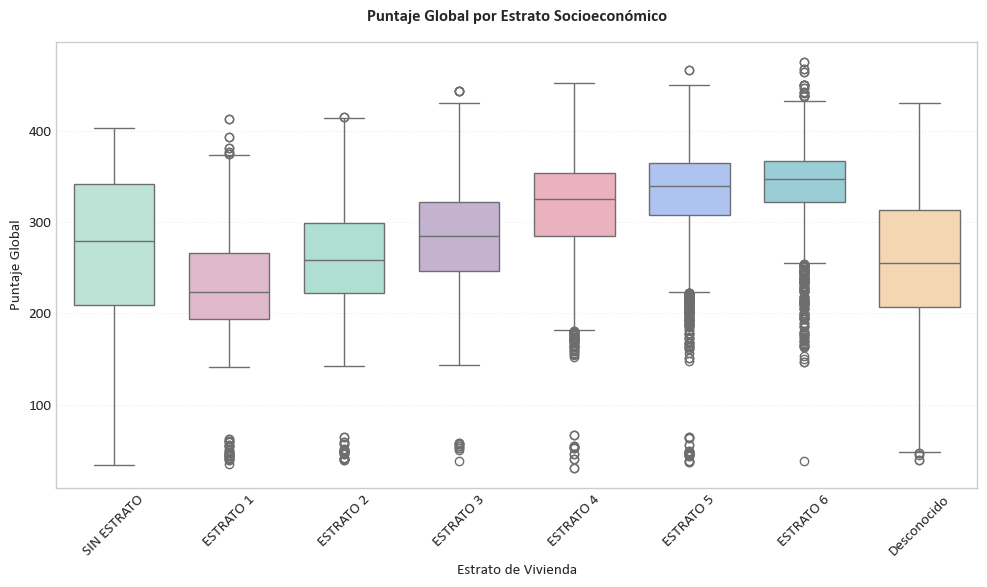

In [36]:
orden_estratos = [
    'SIN ESTRATO', 'ESTRATO 1', 'ESTRATO 2', 'ESTRATO 3', 
    'ESTRATO 4', 'ESTRATO 5', 'ESTRATO 6', 'Desconocido'
]


plt.figure(figsize=(10, 6))


sns.boxplot(data=df, x='fami_estratovivienda', y='punt_global', 
            palette=PALETA_PASTEL[:df['fami_estratovivienda'].nunique()],
            hue='fami_estratovivienda', legend=False, 
            width=0.7, linewidth=1,
            order=orden_estratos)  # Especificar el orden

plt.title("Puntaje Global por Estrato Socioeconómico", pad=15)
plt.xlabel("Estrato de Vivienda")
plt.ylabel("Puntaje Global")
plt.grid(axis='y', linestyle=':', alpha=0.6)


plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

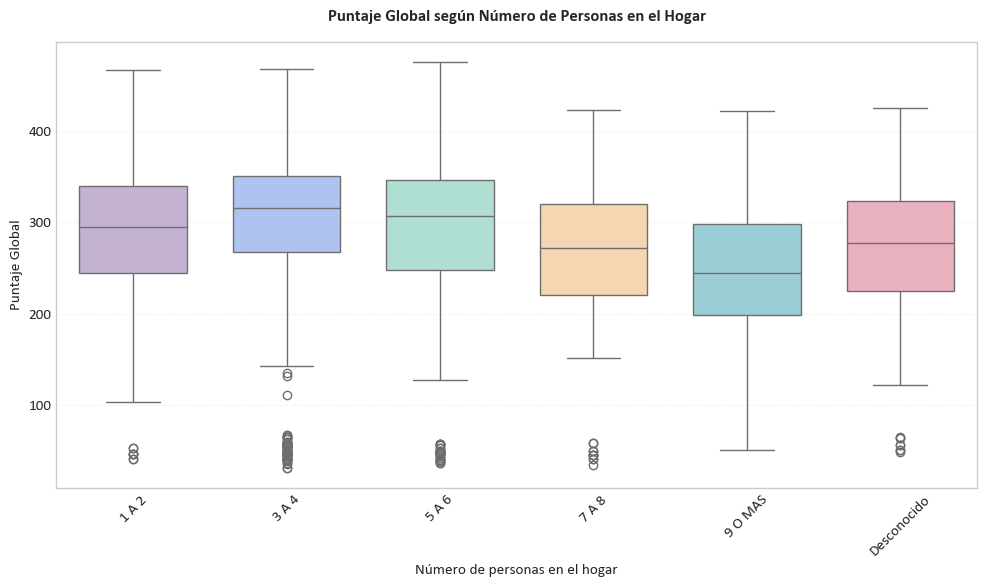

In [38]:
orden_personas = [
    '1 A 2', '3 A 4', '5 A 6', '7 A 8', '9 O MAS', 'Desconocido'
]

plt.figure(figsize=(10, 6))


sns.boxplot(data=df, x='fami_personashogar', y='punt_global',
            palette=PALETA_PASTEL[:df['fami_personashogar'].nunique()],
            hue='fami_personashogar', legend=False,
            width=0.7, linewidth=1,
            order=orden_personas)  # Especificar el orden

plt.title("Puntaje Global según Número de Personas en el Hogar", pad=15)
plt.xlabel("Número de personas en el hogar")
plt.ylabel("Puntaje Global")
plt.grid(axis='y', linestyle=':', alpha=0.6)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

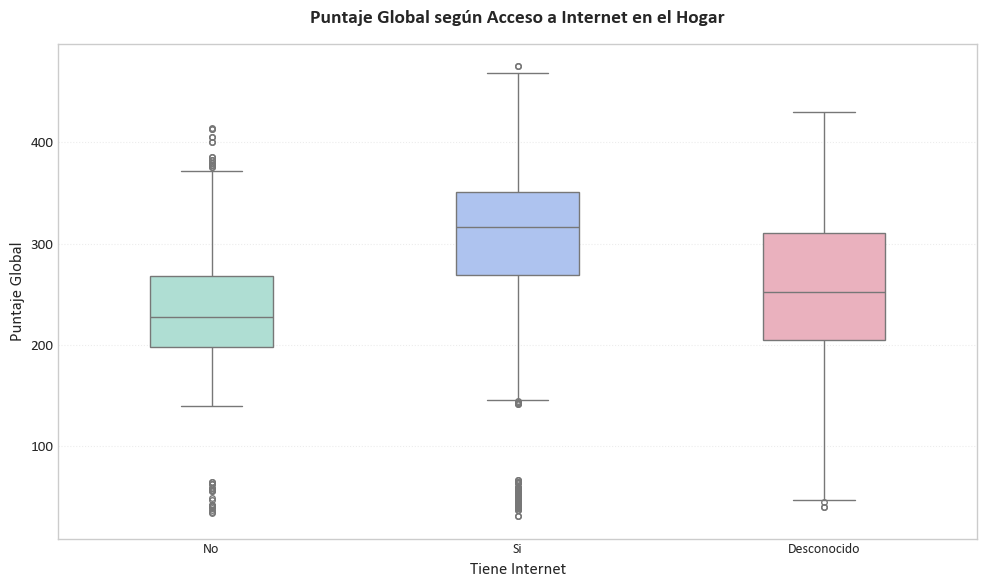

In [58]:
orden_internet = ['No', 'Si', 'Desconocido']  

plt.figure(figsize=(10, 6))

# Crear el boxplot
sns.boxplot(data=df, x='fami_tieneinternet', y='punt_global',
            hue='fami_tieneinternet', palette=PALETA_PASTEL[:df['fami_tieneinternet'].nunique()],
            legend=False, width=0.4, linewidth=1, fliersize=4, order=orden_internet)

# Personalizar el gráfico
plt.title("Puntaje Global según Acceso a Internet en el Hogar", pad=15, fontsize=14)
plt.xlabel("Tiene Internet", fontsize=12)
plt.ylabel("Puntaje Global", fontsize=12)
plt.xticks(fontsize=10)
plt.grid(axis='y', linestyle=':', alpha=0.6)

# Ajustar márgenes
plt.tight_layout()
plt.show()

In [ ]:
# print(df["fami_educacionmadre"].unique)
# print(df["fami_educacionpadre"].unique)

<bound method Series.unique of 0                                 POSTGRADO
1                                 POSTGRADO
2            EDUCACION PROFESIONAL COMPLETA
3            EDUCACION PROFESIONAL COMPLETA
4            EDUCACION PROFESIONAL COMPLETA
                        ...                
32338    SECUNDARIA (BACHILLERATO) COMPLETA
32339                             POSTGRADO
32340                             POSTGRADO
32341                             POSTGRADO
32342                             POSTGRADO
Name: fami_educacionmadre, Length: 32343, dtype: object>
<bound method Series.unique of 0                             POSTGRADO
1                             POSTGRADO
2        EDUCACION PROFESIONAL COMPLETA
3        EDUCACION PROFESIONAL COMPLETA
4                             POSTGRADO
                      ...              
32338    TECNICA O TECNOLOGICA COMPLETA
32339                         POSTGRADO
32340                         POSTGRADO
32341                         POSTGRA

Categorías de educ_madre_cat: ['Postgrado' 'Profesional' 'Secundaria' 'Desconocido'
 'Ninguno o No Aplica' 'Primaria' 'Técnica o Tecnológica']
Categorías de educ_padre_cat: ['Postgrado' 'Profesional' 'Secundaria' 'Técnica o Tecnológica'
 'Desconocido' 'Ninguno o No Aplica' 'Primaria']


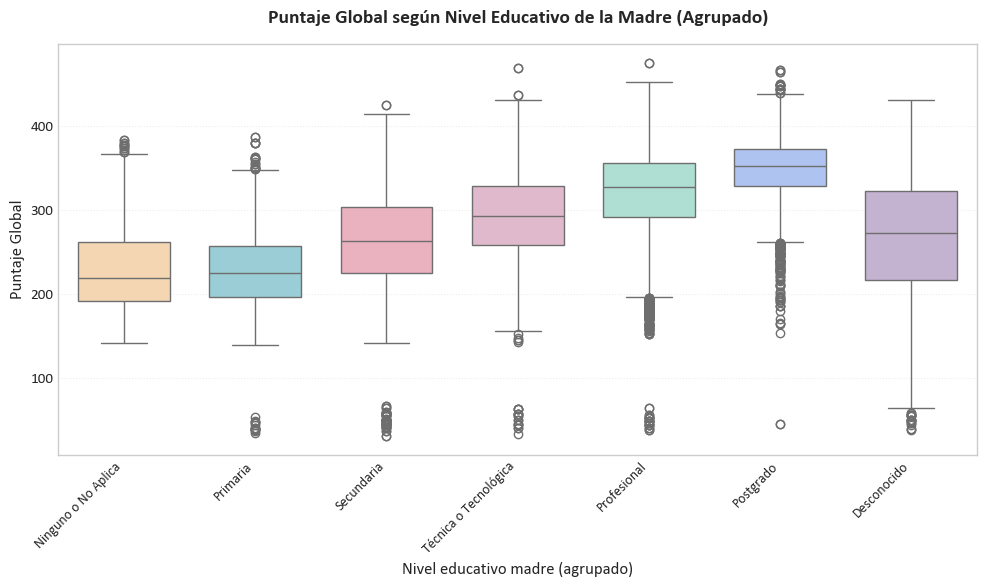

In [ ]:
def agrupar_educacion(nivel):
    if nivel in ['NINGUNO', 'NO APLICA']:
        return 'Ninguno o No Aplica'
    elif 'PRIMARIA' in nivel:
        return 'Primaria'
    elif 'SECUNDARIA' in nivel:
        return 'Secundaria'
    elif 'TECNICA' in nivel or 'TECNOL' in nivel:
        return 'Técnica o Tecnológica'
    elif 'PROFESIONAL' in nivel:
        return 'Profesional'
    elif 'POSTGRADO' in nivel:
        return 'Postgrado'
    elif nivel in ['NO SABE', 'Desconocido']:
        return 'Desconocido'
    else:
        return 'Otro'

# Aplicar la agrupación
df['educ_madre_cat'] = df['fami_educacionmadre'].apply(agrupar_educacion)
# Opcional: para el padre, si lo necesitas
df['educ_padre_cat'] = df['fami_educacionpadre'].apply(agrupar_educacion)

# Verificar las categorías generadas
print("Categorías de educ_madre_cat:", df['educ_madre_cat'].unique())
# Opcional: para el padre
print("Categorías de educ_padre_cat:", df['educ_padre_cat'].unique())

# Definir el orden de las categorías
orden_educacion = [
    'Ninguno o No Aplica', 'Primaria', 'Secundaria', 'Técnica o Tecnológica',
    'Profesional', 'Postgrado', 'Desconocido'
]


plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='educ_madre_cat', y='punt_global',
            hue='educ_madre_cat', palette=PALETA_PASTEL[:df['educ_madre_cat'].nunique()],
            legend=False, order=orden_educacion, width=0.7, linewidth=1)

plt.title("Puntaje Global según Nivel Educativo de la Madre (Agrupado)", pad=15, fontsize=14)
plt.xlabel("Nivel educativo madre (agrupado)", fontsize=12)
plt.ylabel("Puntaje Global", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle=':', alpha=0.6)

plt.tight_layout()
plt.show()

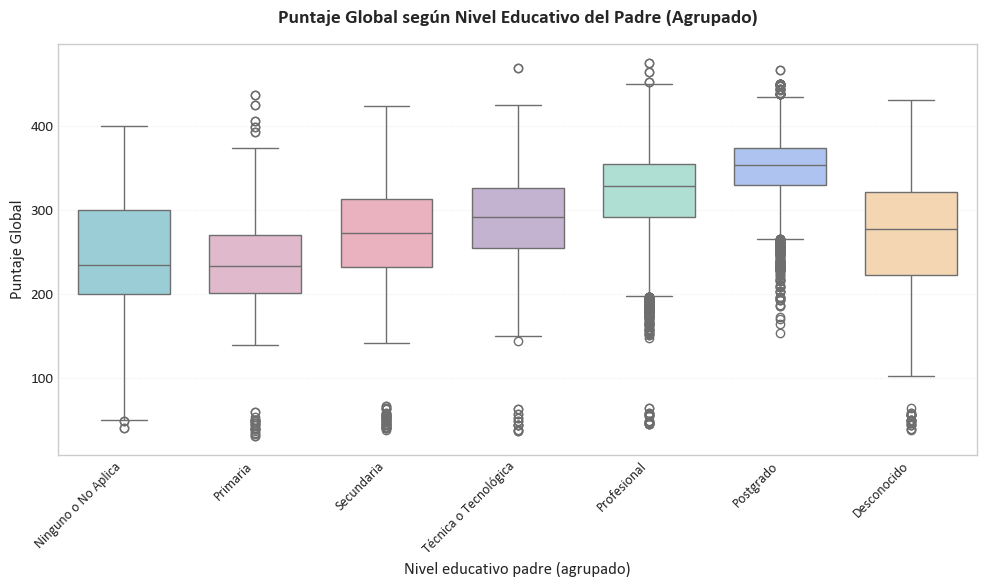

In [50]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='educ_padre_cat', y='punt_global',
            hue='educ_padre_cat', palette=PALETA_PASTEL[:df['educ_padre_cat'].nunique()],
            legend=False, order=orden_educacion, width=0.7, linewidth=1)

plt.title("Puntaje Global según Nivel Educativo del Padre (Agrupado)", pad=15, fontsize=14)
plt.xlabel("Nivel educativo padre (agrupado)", fontsize=12)
plt.ylabel("Puntaje Global", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle=':', alpha=0.6)

plt.tight_layout()
plt.show()

### Características institucionales

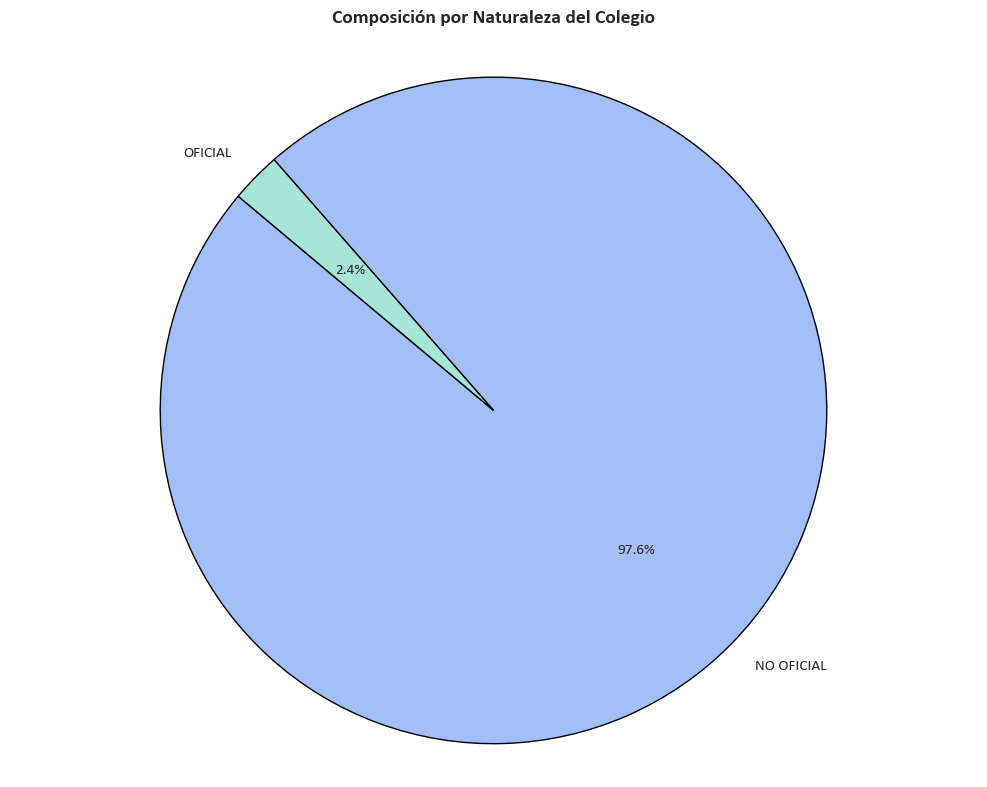

In [52]:
conteos_naturaleza = df['cole_naturaleza'].value_counts()


plt.figure(figsize=(10, 8))
plt.pie(conteos_naturaleza,
        labels=conteos_naturaleza.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=PALETA_PASTEL[:len(conteos_naturaleza)],
        wedgeprops={'edgecolor': 'black'})

plt.title("Composición por Naturaleza del Colegio", pad=15, fontsize=14)
plt.axis('equal')  
plt.tight_layout()
plt.show()

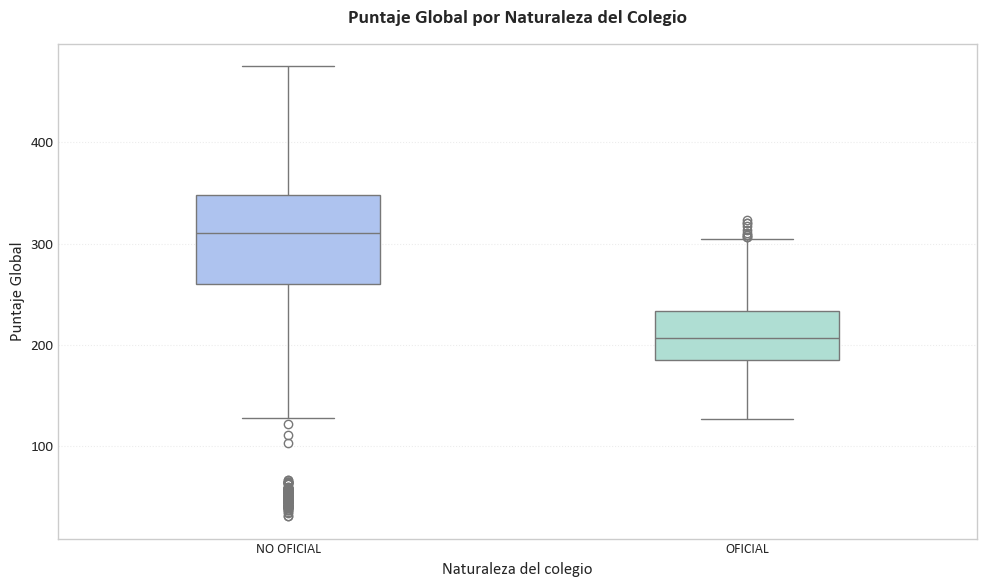

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cole_naturaleza', y='punt_global',
            hue='cole_naturaleza', palette=PALETA_PASTEL[:df['cole_naturaleza'].nunique()],
            legend=False, width=0.4, linewidth=1)
plt.title("Puntaje Global por Naturaleza del Colegio", pad=15, fontsize=14)
plt.xlabel("Naturaleza del colegio", fontsize=12)
plt.ylabel("Puntaje Global", fontsize=12)
plt.xticks(fontsize=10)
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

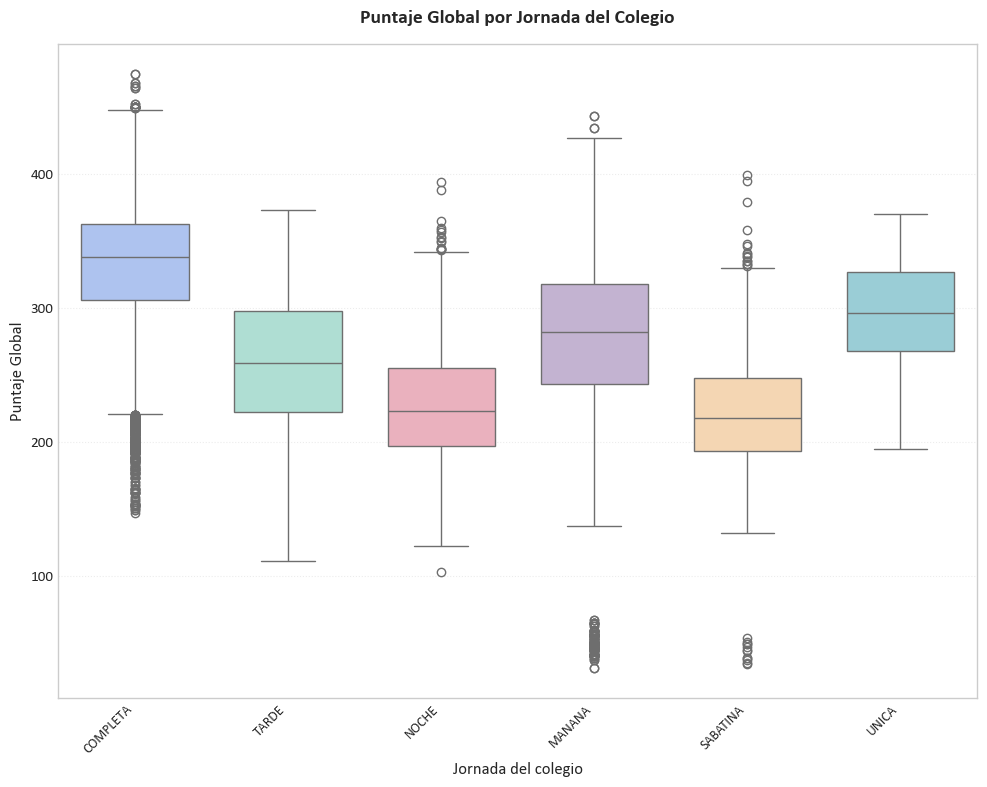

In [53]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='cole_jornada', y='punt_global',
            hue='cole_jornada', palette=PALETA_PASTEL[:df['cole_jornada'].nunique()],
            legend=False, width=0.7, linewidth=1)
plt.title("Puntaje Global por Jornada del Colegio", pad=15, fontsize=14)
plt.xlabel("Jornada del colegio", fontsize=12)
plt.ylabel("Puntaje Global", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

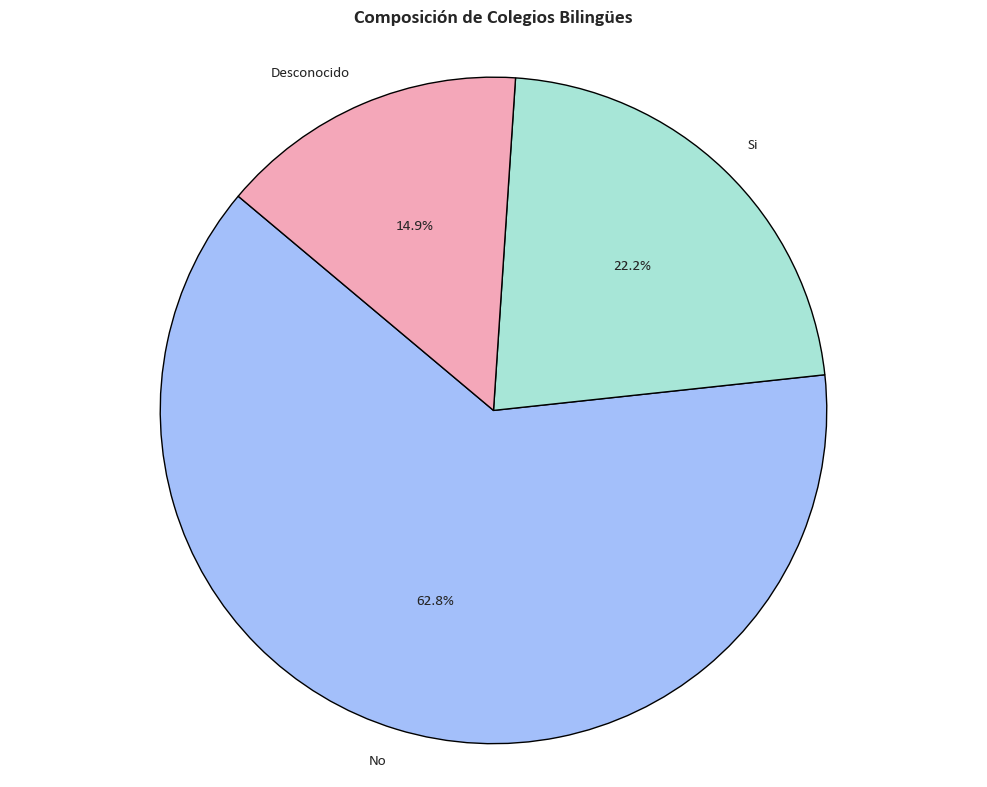

In [57]:
conteos_bilingue = df['cole_bilingue'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(conteos_bilingue,
        labels=conteos_bilingue.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=PALETA_PASTEL[:len(conteos_bilingue)],
        wedgeprops={'edgecolor': 'black'})

plt.title("Composición de Colegios Bilingües", pad=15, fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

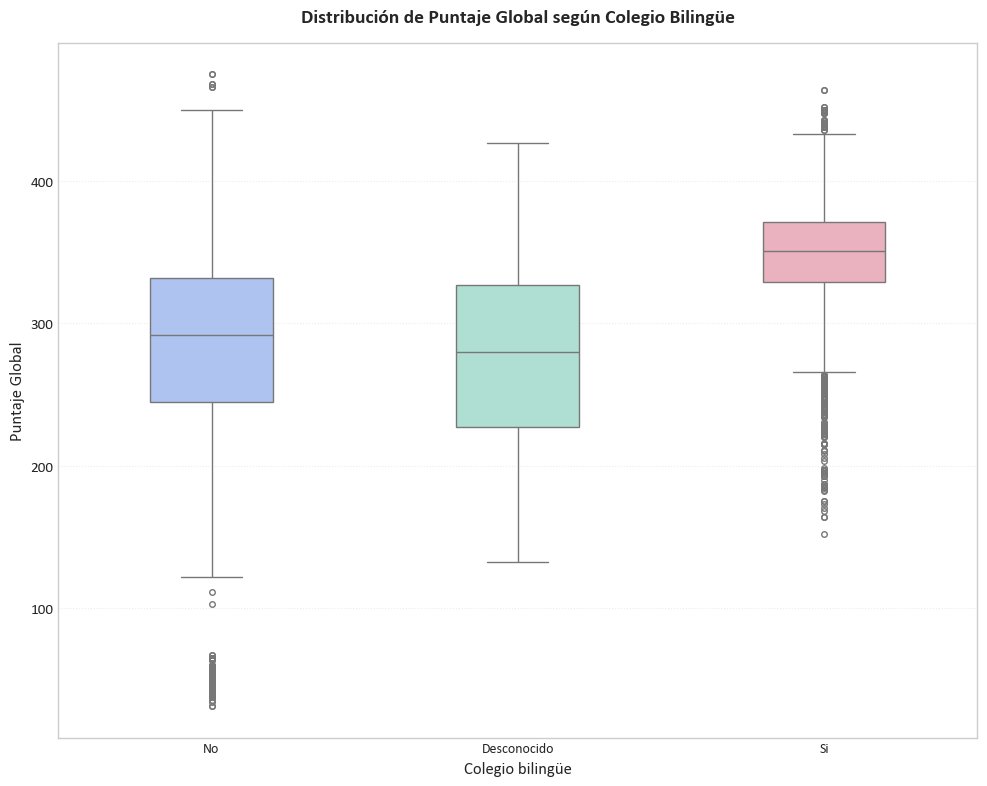

In [56]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='cole_bilingue', y='punt_global',
            hue='cole_bilingue', palette=PALETA_PASTEL[:df['cole_bilingue'].nunique()],
            legend=False, width=0.4, linewidth=1, fliersize=4)

# Personalizar el gráfico
plt.title("Distribución de Puntaje Global según Colegio Bilingüe", pad=15, fontsize=14)
plt.xlabel("Colegio bilingüe", fontsize=12)
plt.ylabel("Puntaje Global", fontsize=12)
plt.xticks(fontsize=10)
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

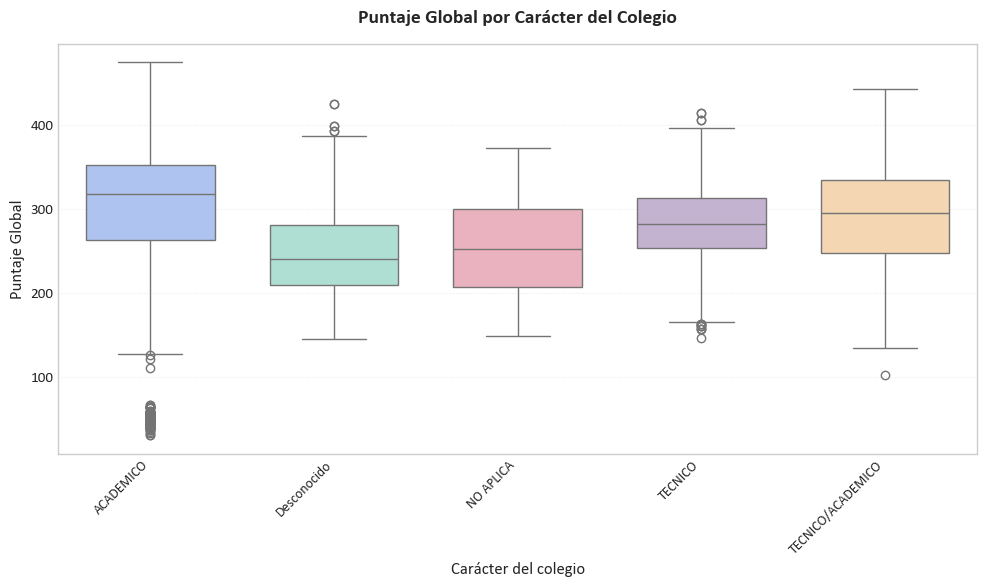

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cole_caracter', y='punt_global',
            hue='cole_caracter', palette=PALETA_PASTEL[:df['cole_caracter'].nunique()],
            legend=False, width=0.7, linewidth=1)
plt.title("Puntaje Global por Carácter del Colegio", pad=15, fontsize=14)
plt.xlabel("Carácter del colegio", fontsize=12)
plt.ylabel("Puntaje Global", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

### Condiciones geográficas

In [60]:
df['cole_area_ubicacion'].unique()

array(['URBANO', 'RURAL'], dtype=object)

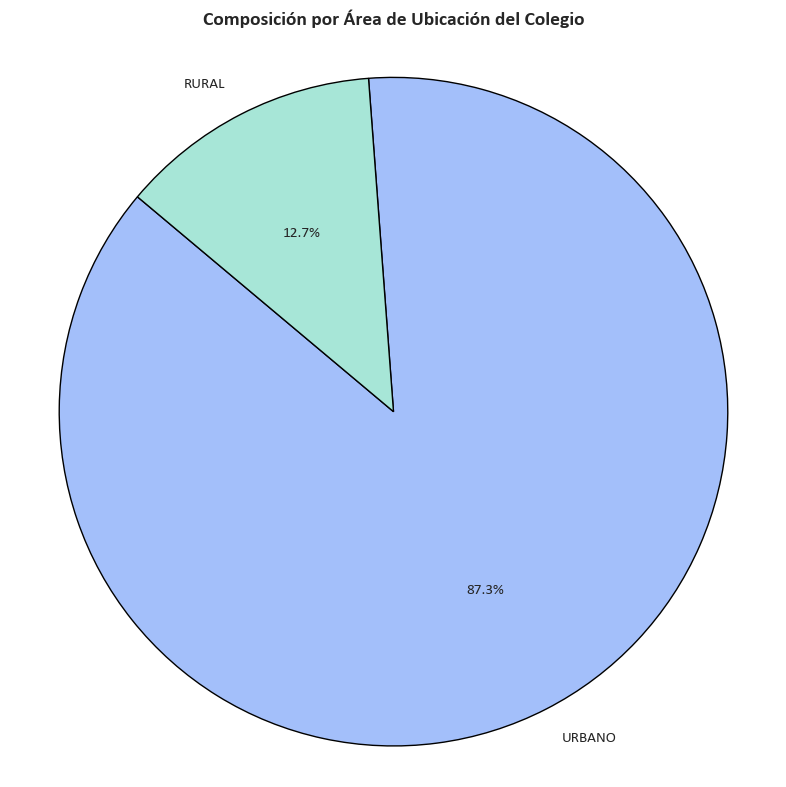

In [62]:
conteos_area = df['cole_area_ubicacion'].value_counts()

orden_area = ['URBANO', 'RURAL']
conteos_area = conteos_area.reindex(orden_area)

plt.figure(figsize=(8, 8))
plt.pie(conteos_area,
        labels=conteos_area.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=PALETA_PASTEL[:len(conteos_area)],
        wedgeprops={'edgecolor': 'black'})

plt.title("Composición por Área de Ubicación del Colegio", pad=15, fontsize=14)
plt.axis('equal')  
plt.tight_layout()
plt.show()

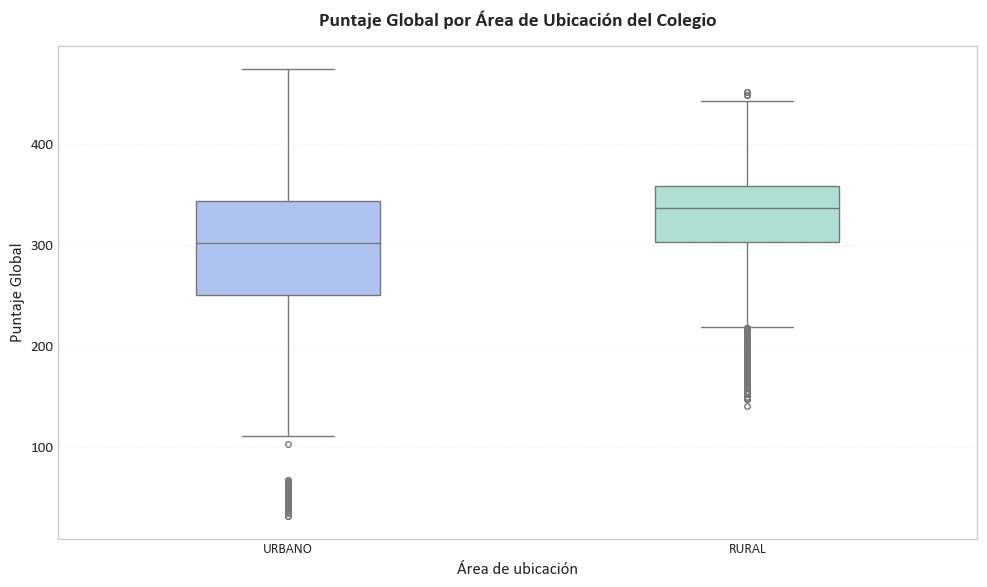

In [61]:
orden_area = ['URBANO', 'RURAL'] 

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cole_area_ubicacion', y='punt_global',
            hue='cole_area_ubicacion', palette=PALETA_PASTEL[:df['cole_area_ubicacion'].nunique()],
            legend=False, width=0.4, linewidth=1, fliersize=4, order=orden_area)
plt.title("Puntaje Global por Área de Ubicación del Colegio", pad=15, fontsize=14)
plt.xlabel("Área de ubicación", fontsize=12)
plt.ylabel("Puntaje Global", fontsize=12)
plt.xticks(fontsize=10)
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

In [73]:
PALETA_PASTEL_EXTENDIDA = [
    '#A3BFFA',  # Azul suave (original)
    '#A7E6D7',  # Verde menta (original)
    '#F4A7B9',  # Rosa pálido (original)
    '#C3AED6',  # Lavanda suave (original)
    '#FFD7A8',  # Melocotón claro (original)
    '#90D4E0',  # Turquesa pastel (original)
    '#E6B3CC',  # Malva claro (original)
    '#B5EAD7',  # Verde celadón (original)
    '#FFCCBC',  # Coral suave (original)
    '#D9D9D9',  # Gris claro (original)
    '#B2C8F0',  # Azul perla (original)
    '#F4C4C4',  # Rosa melocotón (original)
    '#CCE0CF',  # Verde salvia claro
    '#E6D1B8',  # Beige arena
    '#D6BEE6',  # Lila pálido
    '#B8DDE6',  # Azul cielo suave
    '#FFE6CC',  # Amarillo vainilla
    '#C4A7EB',  # Violeta pastel
    '#AEE2E0',  # Aguamarina suave
    '#FFBABA',  # Rojo coral claro
    '#E1C1BE',  # Rosa antiguo claro
    '#D4A3A3'   # Rosa terracota claro
]

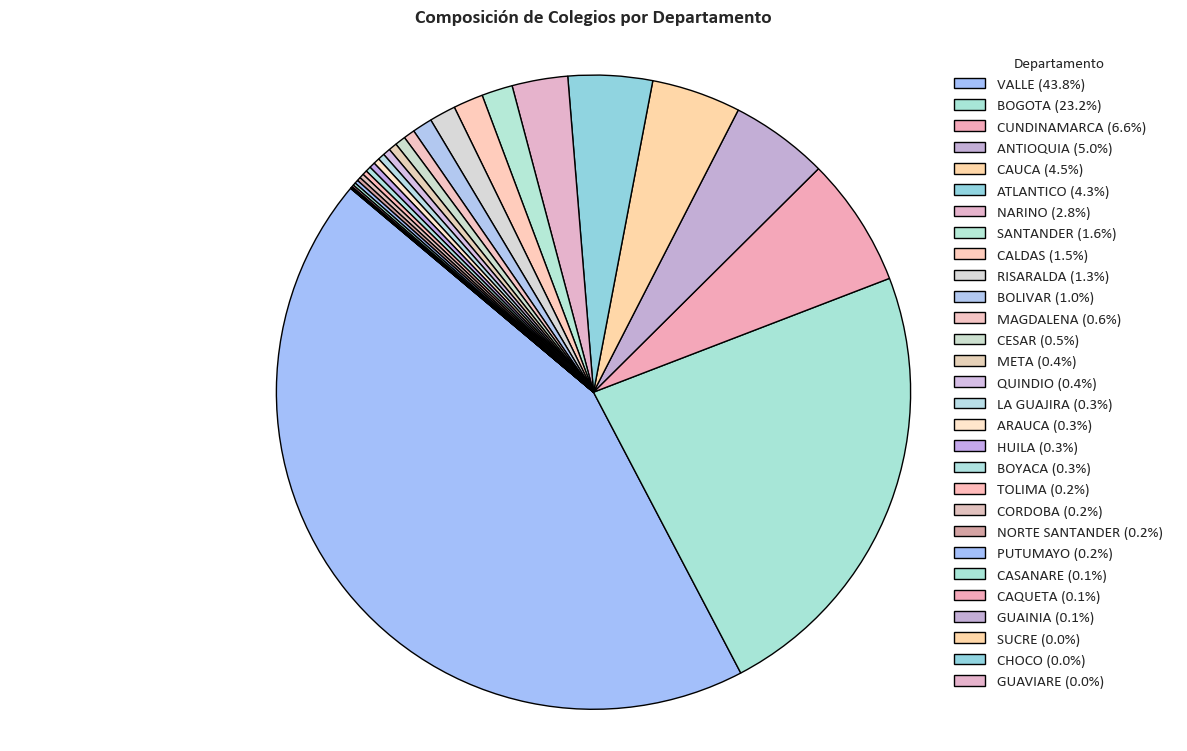

In [74]:

conteos_deptos = df['cole_depto_ubicacion'].value_counts()

plt.figure(figsize=(12, 8))
plt.pie(conteos_deptos,
        startangle=140,
        colors=PALETA_PASTEL_EXTENDIDA[:len(conteos_deptos)],
        wedgeprops={'edgecolor': 'black'})

total = conteos_deptos.sum()
porcentajes = [f'{p:.1f}%' for p in 100. * conteos_deptos / total]
etiquetas_leyenda = [f'{departamento} ({porcentaje})' for departamento, porcentaje in zip(conteos_deptos.index, porcentajes)]

plt.legend(etiquetas_leyenda, title="Departamento", loc="best")

plt.title("Composición de Colegios por Departamento", pad=15, fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

C:\Users\Esteban\AppData\Local\Temp\ipykernel_7448\627883079.py:4: UserWarning: 
The palette list has fewer values (22) than needed (29) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=dept_promedio, x='cole_depto_ubicacion', y='punt_global',


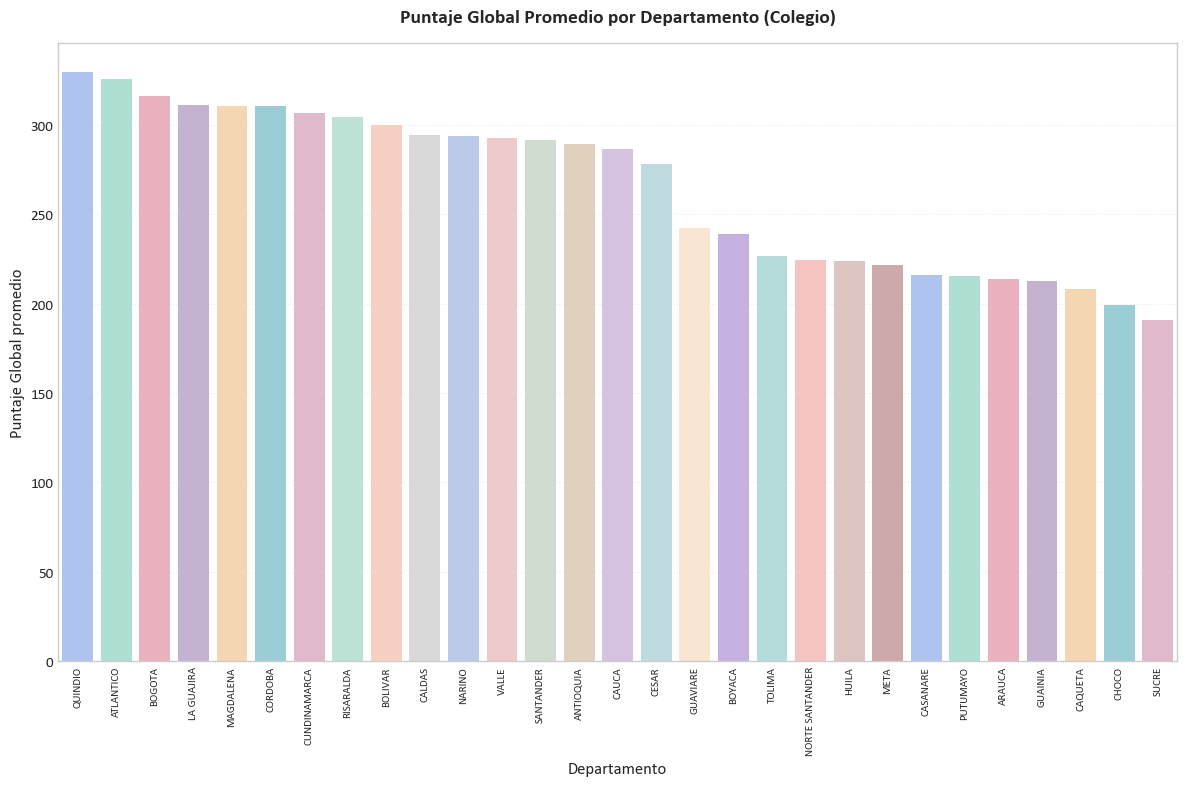

In [75]:
dept_promedio = df.groupby('cole_depto_ubicacion')['punt_global'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=dept_promedio, x='cole_depto_ubicacion', y='punt_global',
            hue='cole_depto_ubicacion', palette=PALETA_PASTEL_EXTENDIDA[:len(dept_promedio)],
            legend=False)
plt.title("Puntaje Global Promedio por Departamento (Colegio)", pad=15, fontsize=14)
plt.xlabel("Departamento", fontsize=12)
plt.ylabel("Puntaje Global promedio", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

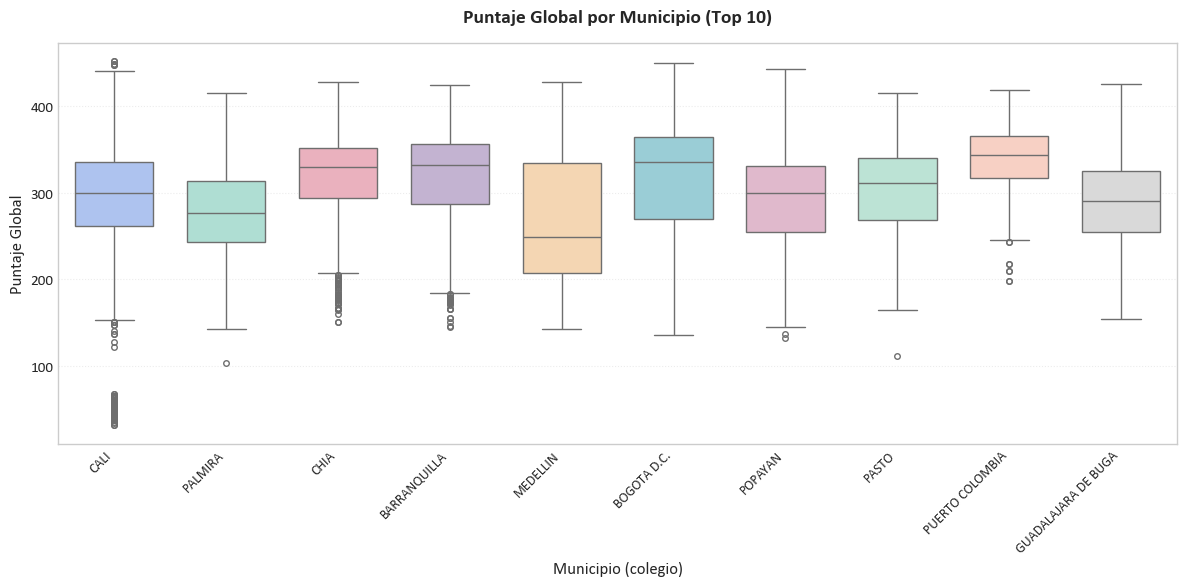

In [76]:
top_mcpios = df['cole_mcpio_ubicacion'].value_counts().head(10).index.tolist()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['cole_mcpio_ubicacion'].isin(top_mcpios)], 
            x='cole_mcpio_ubicacion', y='punt_global',
            hue='cole_mcpio_ubicacion', palette=PALETA_PASTEL[:len(top_mcpios)],
            legend=False, width=0.7, linewidth=1, fliersize=4)
plt.title("Puntaje Global por Municipio (Top 10)", pad=15, fontsize=14)
plt.xlabel("Municipio (colegio)", fontsize=12)
plt.ylabel("Puntaje Global", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

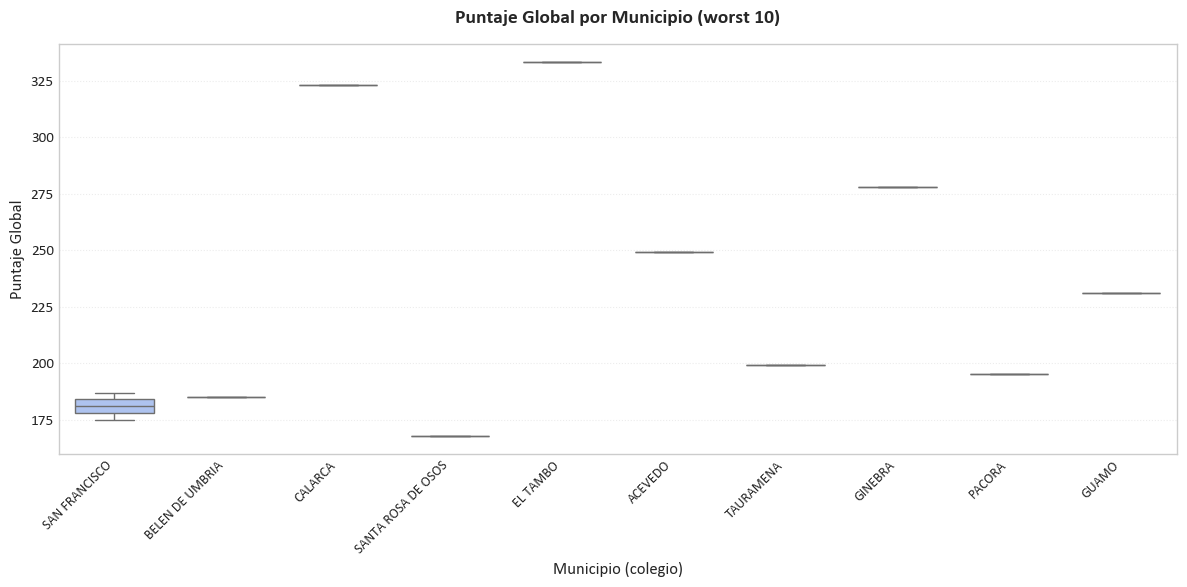

In [77]:
top_mcpios = df['cole_mcpio_ubicacion'].value_counts().tail(10).index.tolist()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['cole_mcpio_ubicacion'].isin(top_mcpios)], 
            x='cole_mcpio_ubicacion', y='punt_global',
            hue='cole_mcpio_ubicacion', palette=PALETA_PASTEL[:len(top_mcpios)],
            legend=False, width=0.7, linewidth=1, fliersize=4)
plt.title("Puntaje Global por Municipio (worst 10)", pad=15, fontsize=14)
plt.xlabel("Municipio (colegio)", fontsize=12)
plt.ylabel("Puntaje Global", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

### Relevantes

In [78]:
colegios_promedio = df.groupby(['cole_nombre_establecimiento', 'cole_depto_ubicacion', 'cole_mcpio_ubicacion', 'cole_naturaleza'])['punt_global'].mean().reset_index()
top_10_colegios = colegios_promedio.sort_values(by='punt_global', ascending=False).head(10) 

print("\nTop 10 colegios con mejor puntaje global promedio:")
print(top_10_colegios[['cole_nombre_establecimiento', 'cole_depto_ubicacion', 'cole_mcpio_ubicacion', 'cole_naturaleza', 'punt_global']].round(2))


Top 10 colegios con mejor puntaje global promedio:
            cole_nombre_establecimiento cole_depto_ubicacion  \
154            COL LA QUINTA DEL PUENTE            SANTANDER   
174                 COL NUEVO CAMBRIDGE            SANTANDER   
228         COLEGIO BILINGUE DIANA OESE                VALLE   
185         COL SAN JORGE DE INGLATERRA               BOGOTA   
471               GIMN ALESSANDRO VOLTA               BOGOTA   
183                      COL SAN CARLOS               BOGOTA   
385  COLEGIO PHILADELPHIA INTERNACIONAL                VALLE   
307                     COLEGIO HARVARD            SANTANDER   
497                    GIMNASIO VERMONT               BOGOTA   
159                     COL LOS NOGALES               BOGOTA   

    cole_mcpio_ubicacion cole_naturaleza  punt_global  
154        FLORIDABLANCA      NO OFICIAL       400.63  
174        FLORIDABLANCA      NO OFICIAL       400.15  
228                 CALI      NO OFICIAL       388.58  
185          BOGOTA

In [80]:
top_10_estudiantes = df[['estu_fechanacimiento', 'estu_nacionalidad', 'estu_depto_reside', 'estu_mcpio_reside', 'punt_global']].sort_values(by='punt_global', ascending=False).head(10)

top_10_estudiantes['estu_fechanacimiento'] = pd.to_datetime(top_10_estudiantes['estu_fechanacimiento'], errors='coerce')
fecha_actual = pd.to_datetime('2018-12-12')

top_10_estudiantes['edad'] = ((fecha_actual - top_10_estudiantes['estu_fechanacimiento']).dt.days / 365.25).round().astype('Int64')

print("\nTop 10 estudiantes con mejor puntaje global:")
print(top_10_estudiantes[['edad', 'estu_nacionalidad', 'estu_depto_reside', 'estu_mcpio_reside', 'punt_global']])


Top 10 estudiantes con mejor puntaje global:
       edad estu_nacionalidad estu_depto_reside estu_mcpio_reside  punt_global
4616     17          COLOMBIA         SANTANDER       BUCARAMANGA          475
4617     17          COLOMBIA         SANTANDER       BUCARAMANGA          475
2096     18          COLOMBIA         SANTANDER       BUCARAMANGA          468
2097     18          COLOMBIA         SANTANDER       BUCARAMANGA          468
12023    18          COLOMBIA         SANTANDER     FLORIDABLANCA          466
12024    18          COLOMBIA         SANTANDER     FLORIDABLANCA          466
7796     18          COLOMBIA         SANTANDER       BUCARAMANGA          464
7797     18          COLOMBIA         SANTANDER       BUCARAMANGA          464
7751     19          COLOMBIA             VALLE              CALI          452
7752     19          COLOMBIA             VALLE              CALI          452


## Ingeniería de Features

In [12]:
df['nivel_rendimiento'] = pd.cut(df['punt_global'],
                                bins=[0, 250, 300, 350, 500],
                                labels=['Bajo', 'Medio', 'Alto', 'Excelente'])
# df['acceso_tecnologia'] = df[['fami_tienecomputador', 'fami_tieneinternet']].mean(axis=1)
df['movilidad_educativa'] = np.where(
    df['estu_cod_depto_presentacion'] == df['estu_cod_reside_depto'],
    'Mismo Depto',
    'Diferente Depto'
)

In [13]:
df['efecto_pares'] = pd.qcut(df.groupby('cole_codigo_icfes')['punt_global']
                          .transform('mean'),
                          q=5,
                          labels=['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto'])

In [14]:
# Valores únicos y conteo para educación de la madre
print("Valores únicos para fami_educacionmadre:")
print(df['fami_educacionmadre'].value_counts(dropna=False))

# Valores únicos para educación del padre
print("\nValores únicos para fami_educacionpadre:")
print(df['fami_educacionpadre'].value_counts(dropna=False))

Valores únicos para fami_educacionmadre:
fami_educacionmadre
EDUCACION PROFESIONAL COMPLETA          10839
POSTGRADO                                5163
SECUNDARIA (BACHILLERATO) COMPLETA       4433
TECNICA O TECNOLOGICA COMPLETA           2872
Desconocido                              1756
SECUNDARIA (BACHILLERATO) INCOMPLETA     1744
EDUCACION PROFESIONAL INCOMPLETA         1405
PRIMARIA INCOMPLETA                      1287
PRIMARIA COMPLETA                         929
NO SABE                                   794
TECNICA O TECNOLOGICA INCOMPLETA          790
NINGUNO                                   273
NO APLICA                                  58
Name: count, dtype: int64

Valores únicos para fami_educacionpadre:
fami_educacionpadre
EDUCACION PROFESIONAL COMPLETA          9422
POSTGRADO                               5552
SECUNDARIA (BACHILLERATO) COMPLETA      4617
TECNICA O TECNOLOGICA COMPLETA          2169
SECUNDARIA (BACHILLERATO) INCOMPLETA    2156
Desconocido                 

In [20]:
# Diccionario de mapeo definitivo
education_map = {
    'NINGUNO': 0,
    'NO SABE': 0,
    'NO APLICA': 0,
    'PRIMARIA INCOMPLETA': 1,
    'PRIMARIA COMPLETA': 2,
    'SECUNDARIA (BACHILLERATO) INCOMPLETA': 3,
    'SECUNDARIA (BACHILLERATO) COMPLETA': 4,
    'TECNICA O TECNOLOGICA INCOMPLETA': 4.5,
    'TECNICA O TECNOLOGICA COMPLETA': 5,
    'EDUCACION PROFESIONAL INCOMPLETA': 5.5,
    'EDUCACION PROFESIONAL COMPLETA': 6,
    'POSTGRADO': 7,
    'DESCONOCIDO': -1  # Valor especial para desconocido
}

# Función de mapeo robusta
def map_education(value):
    value_cleaned = str(value).strip().upper()
    return education_map.get(value_cleaned, -1)  # Default a -1 si no encuentra coincidencia

# Creación de la variable
df['nivel_educativo_hogar'] = (
    df[['fami_educacionmadre', 'fami_educacionpadre']]
    .map(map_education)
    .mean(axis=1)
    .round()
    .replace(-1, 'Desconocido')  # Convertimos los -1 resultantes
)

# df['nivel_educativo_hogar_num'] = (
#     df['nivel_educativo_hogar']
#     .replace('Desconocido', np.nan)
#     .astype(float)
# )

In [16]:
df.head()

,periodo,estu_tipodocumento,estu_consecutivo,cole_area_ubicacion,cole_bilingue,cole_calendario,cole_caracter,cole_cod_dane_establecimiento,cole_cod_dane_sede,cole_cod_depto_ubicacion,...,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global,semestre_prueba,nivel_rendimiento,movilidad_educativa,efecto_pares,nivel_educativo_hogar
0,20181,CC,SB11201810003214,URBANO,No,B,ACADEMICO,376001002376,376001002376,76,...,68.0,76,69,67,353,1,Excelente,Mismo Depto,Muy alto,7.0
1,20181,CC,SB11201810003214,URBANO,No,B,ACADEMICO,376001002376,376001002376,76,...,68.0,76,69,67,353,1,Excelente,Mismo Depto,Muy alto,7.0
2,20181,TI,SB11201810043861,RURAL,Desconocido,B,ACADEMICO,476520003791,476520003791,76,...,49.0,41,49,44,227,1,Bajo,Mismo Depto,Bajo,6.0
3,20181,TI,SB11201810043861,RURAL,Desconocido,B,ACADEMICO,476520003791,476520003791,76,...,49.0,41,49,44,227,1,Bajo,Mismo Depto,Bajo,6.0
4,20181,CC,SB11201810004937,RURAL,No,OTRO,ACADEMICO,425175032542,425175032542,25,...,57.0,48,57,55,273,1,Medio,Mismo Depto,Medio,6.0


In [21]:
print("Valores únicos en 'nivel_educativo_hogar':")
print(df['nivel_educativo_hogar'].astype(str).unique())

Valores únicos en 'nivel_educativo_hogar':
['7.0' '6.0' '4.0' '5.0' 'Desconocido' '0.0' '2.0' '3.0' '1.0' '-0.0']


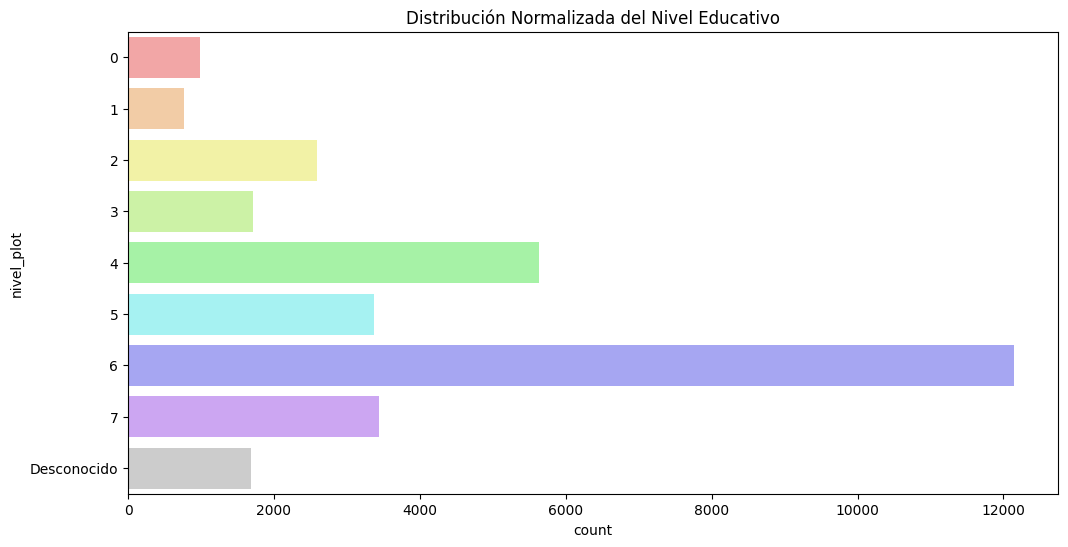

In [23]:
# Limpieza adicional
df['nivel_plot'] = df['nivel_educativo_hogar'].astype(str)
df['nivel_plot'] = df['nivel_plot'].str.replace('.0', '').replace('-0', '0')

# Actualizar paleta y orden
palette = {
    '0': '#ff9999', 
    '1': '#ffcc99',
    '2': '#ffff99',
    '3': '#ccff99',
    '4': '#99ff99',
    '5': '#99ffff',
    '6': '#9999ff',
    '7': '#cc99ff',
    'Desconocido': '#cccccc'
}
orden = ['0', '1', '2', '3', '4', '5', '6', '7', 'Desconocido']

# Gráfico
plt.figure(figsize=(12, 6))
sns.countplot(
    y='nivel_plot',
    data=df,
    order=orden,
    palette=palette,
    hue='nivel_plot',
    legend=False,
    dodge=False
)
plt.title('Distribución Normalizada del Nivel Educativo')
plt.show()